
# pop-x0.25
 Example

## Dimensions

This SEDAC population data has the dimensions:

  - **time** (*datetime64[ns]*) - The time dimension for the data, yearly resolution.
  - **lat** (*float64*) - The latitude dimension for the data, 1.0° resolution, based on raw data at 1/8° resolution.
  - **lon** (*float64*) - The longitude dimension for the data, 1.0° resolution, based on raw data at 1/8° resolution.
  - **bnds** (*int64*) - The bounds dimension for the data, [0, 1] for each coordinate.

Data variables are organized with respect to those dimensions and can be queried by index, or by dimension.

## Example Data

In the following section, we explore some sample data from the SEDAC dataset.

### Reading the `.nc` file

We use [`xarray`](https://docs.xarray.dev), to read in the `.nc` file as an `xarray.Dataset` object.

In [1]:
import xarray as xr

In [2]:
data = xr.open_dataset("../timeseries-popdensity-annual-mean_pop-x1_gpw-v4-rev11-ssp370_timeseries_mean_2010-2100.nc")

### Examining the data

We can examine the data by printing the `xarray.Dataset` object.
Specifically, we can see the dimensions, coordinates, and data variables.

Further examination of the data can be done by viewing an individual coordinate, data variable, or the attributes of the dataset.

In [3]:
data

<xarray.Dataset>
Dimensions:                            (time: 10, lat: 181, lon: 361, bnds: 2)
Coordinates:
  * time                               (time) datetime64[ns] 2010-07-01 ... 2...
  * lat                                (lat) float64 -90.0 -89.0 ... 89.0 90.0
  * lon                                (lon) float64 -180.0 -179.0 ... 180.0
Dimensions without coordinates: bnds
Data variables:
    timeseries-popdensity-annual-mean  (time, lat, lon) float32 ...
    lon_bnds                           (lon, bnds) float64 ...
    lat_bnds                           (lat, bnds) float64 ...
Attributes: (12/20)
    title:                 Gridded Population of the World, Version 4, Revisi...
    data_source:           Gridded Population of the World, Version 4: GPWv4;...
    user:                  file standardized by Caspar Ammann, Climate Strate...
    creation_date:         Thu Feb  9 09:26:42 MST 2023
    wb_truncation_label:   3
    wb_grid_label:         x1
    ...                    ...
    wb_variable_label:     popdensity
    wb_product_label:      timeseries
    wb_collection_label:   pop-x1
    Source_Software:       Esri ArcGIS
    Conventions:           CF-1.0
    population_reference:   \nData Set: Jones, B., and B. C. O'Neill. 2020. G...

In [4]:
data['time']

<xarray.DataArray 'time' (time: 10)>
array(['2010-07-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2030-07-01T00:00:00.000000000', '2040-07-01T00:00:00.000000000',
       '2050-07-01T00:00:00.000000000', '2060-07-01T00:00:00.000000000',
       '2070-07-01T00:00:00.000000000', '2080-07-01T00:00:00.000000000',
       '2090-07-01T00:00:00.000000000', '2100-07-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2010-07-01 2020-07-01 ... 2100-07-01
Attributes:
    long_name:  time
    axis:       T

In [5]:
data['lon_bnds']

<xarray.DataArray 'lon_bnds' (lon: 361, bnds: 2)>
[722 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
Dimensions without coordinates: bnds

In [6]:
data.attrs

{'title': 'Gridded Population of the World, Version 4, Revision 11; 1x1-degrees based on 1/8th degree raw data',
 'data_source': 'Gridded Population of the World, Version 4: GPWv4; Revision 11, Dec 2018',
 'user': 'file standardized by Caspar Ammann, Climate Strategies',
 'creation_date': 'Thu Feb  9 09:26:42 MST 2023',
 'wb_truncation_label': 3,
 'wb_grid_label': 'x1',
 'wb_period_label': '2010-2100',
 'wb_percentile_label': 'mean',
 'wb_type_label': 'timeseries',
 'wb_model_label': 'gpw-v4',
 'wb_variant_label': 'rev11',
 'wb_scenario_label': 'ssp370',
 'wb_statistic_label': 'mean',
 'wb_aggregation_label': 'annual',
 'wb_variable_label': 'popdensity',
 'wb_product_label': 'timeseries',
 'wb_collection_label': 'pop-x1',
 'Source_Software': 'Esri ArcGIS',
 'Conventions': 'CF-1.0',
 'population_reference': " \nData Set: Jones, B., and B. C. O'Neill. 2020. Global One-Eighth Degree Population \nBase Year and Projection Grids Based on the Shared Socioeconomic Pathways, Revision 01.\nPalis

### Visualizing the data

We can visualize the primary data variable in the example dataset, *timeseries-popdensity-annual-mean* (if `matplotlib` is installed), by using the built-in `.plot()` method of the `xarray.DataArray` object.

If we just call the `.plot()` method, we get a default plot of the data, which in this case reduces the dimensionality of the data from 3-D (time, lat, lon) to 1-D, by generating a bar plot of the mean value of the data variable over the entire time period for each latitude and longitude.

(array([1.60643e+05, 5.12000e+02, 4.20000e+01, 2.90000e+01, 8.00000e+00,
        5.00000e+00, 6.00000e+00, 5.00000e+00, 7.00000e+00, 3.00000e+00]),
 array([    0.        ,  1760.3527832 ,  3520.70556641,  5281.05810547,
         7041.41113281,  8801.76367188, 10562.11621094, 12322.46875   ,
        14082.82226562, 15843.17480469, 17603.52734375]),
 <BarContainer object of 10 artists>)

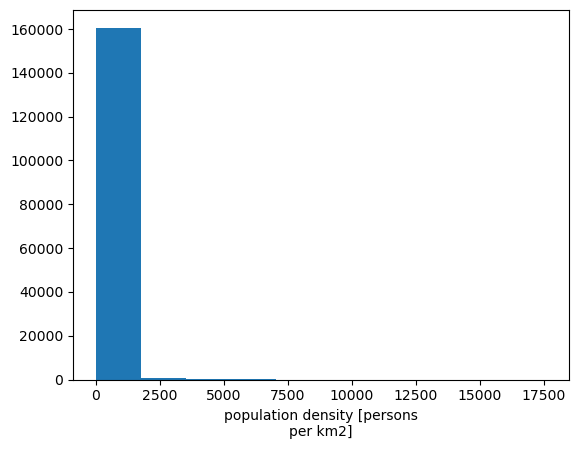

In [7]:
data['timeseries-popdensity-annual-mean'].plot()

If we want to view the data as a 2-D surface plotted at a specific instance in time, we can use the `.plot()` method to specify the time index we want to plot.
Because we are working with a `.nc` file that has been loaded as an `xarray.Dataset` object, we can use the `.sel()` method to select the time index we want to plot directly, we do not need to calculate or search for the index value.

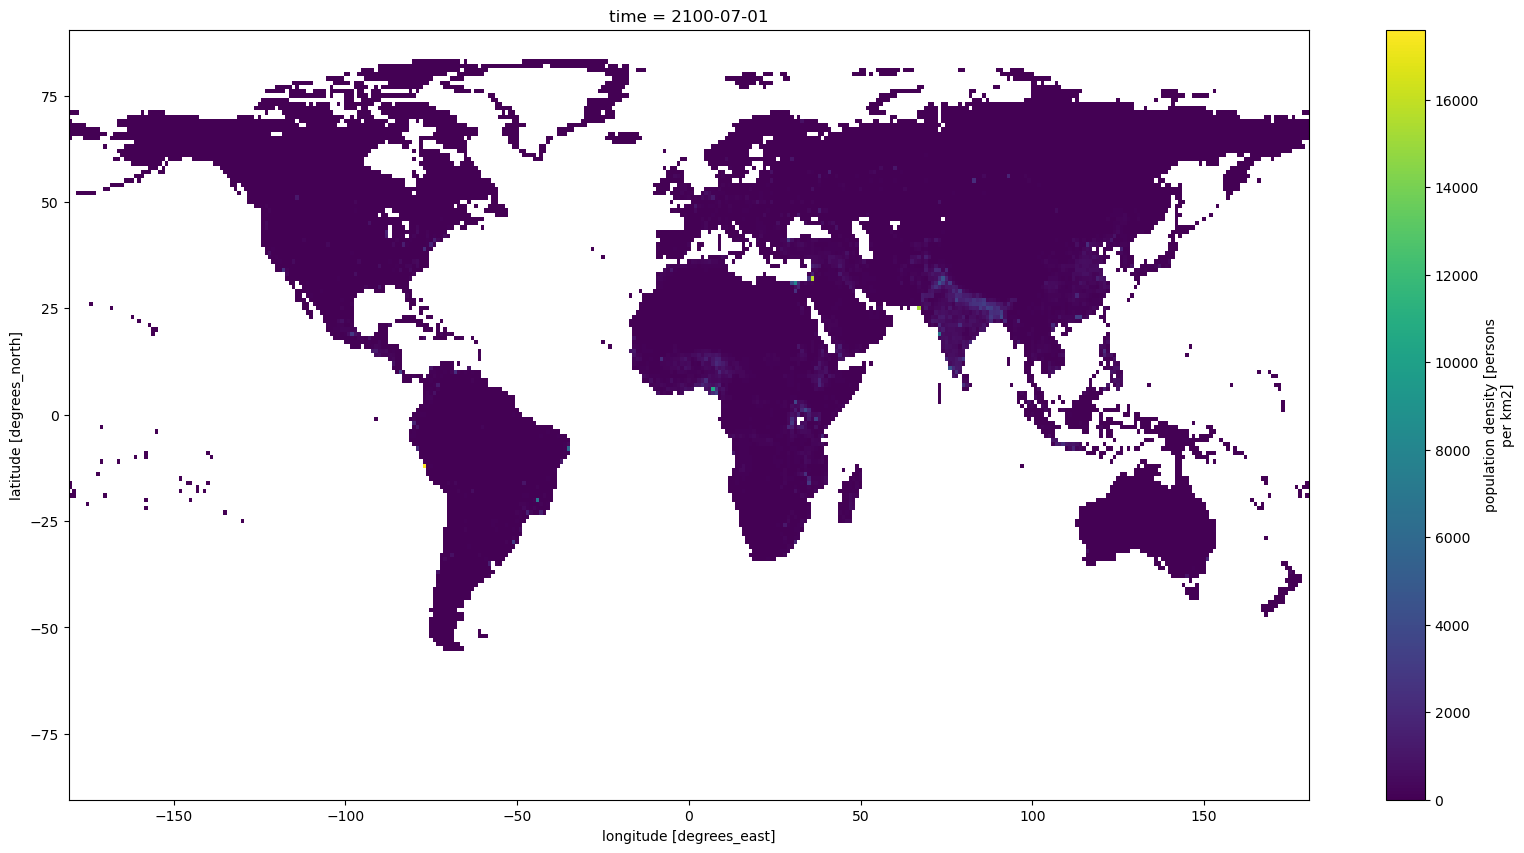

In [8]:
data["timeseries-popdensity-annual-mean"].sel(time=slice('2100-07-01', '2100-07-01')).plot(figsize=(20,10))